## Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.
Instructions

    1. Load the dataset and explore the variables.
    2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
    3. Extract the target variable.
    4. Extract the independent variables and scale them.
    5. Build the logistic regression model.
    6. Evaluate the model.
    7. Even a simple model will give us more than 70% accuracy. Why?
    8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
    9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


<a id='section0'></a>
### Index

1. [EDA | Explore the data](#section1)
2. [Extract the independent variables and scale them](#section2)
3. [Building the logistic regression model, with imbalanced target](#section3)
    + 3.1 [Confusion Matrix](#section3.1)
    + 3.2 [ROC Curve](#section3.2)
    + 3.3 [Classification Report](#section3.3)
3. [Performing SMOTE](#section4)
5. [Building the logistic regression model, with resampled target](#section5)
    + 5.1 [Confusion Matrix](#section5.1)
    + 5.2 [ROC Curve](#section5.2)
    + 5.3 [Classification Report](#section5.3)
6. [Undersample with Tomek Links](#section6)
    + 6.1 [Confusion Matrix](#section6.1)
    + 6.2 [ROC Curve](#section6.2)
    + 6.3 [Classification Report](#section6.3)

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

'Optional Lab - Imbalanced data.ipynb'  'Predict the flower class.ipynb'


In [3]:
df = pd.read_csv('../data/customer_churn.csv')

<a id='section1'></a>

### EDA | Explore the data

[Index](#section0)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Extract the target variable

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [9]:
############################################
### good way to pass to numericals #########
############################################

y = (df.Churn == 'Yes').astype(int)
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [10]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<a id='section2'></a>

### 2. Extract the independent variables and scale them

[Index](#section0)

In [11]:
X = df[["tenure", "SeniorCitizen", "MonthlyCharges"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [12]:
# rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_standardized = transformer.transform(X)
print(X_standardized.shape)

(7043, 3)


<a id='section3'></a>

### Building the logistic regression model, with imbalanced target

[Index](#section0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [15]:
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,multi_class='ovr').fit(X_train, y_train)

In [16]:
predictions = clf.predict(X_test)

In [17]:
accuracy_score(y_test, predictions)

0.8076650106458482

In [18]:
y_test.value_counts()

0    1036
1     373
Name: Churn, dtype: int64

In [19]:
predicton = pd.DataFrame(predictions)
predicton.value_counts()

0    1149
1     260
dtype: int64

<a id='section3.1'></a>

#### Confusion Matrix

[Index](#section0)

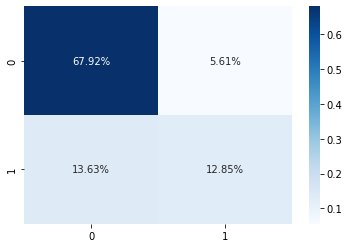

In [20]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

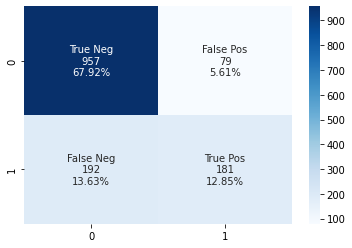

In [21]:
group_names = ["True Neg","False Pos",'False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='section3.2'></a>

#### ROC Curve

[Index](#section0)

In [22]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.65250965e-04,
       9.65250965e-04, 2.89575290e-03, 2.89575290e-03, 3.86100386e-03,
       3.86100386e-03, 4.82625483e-03, 4.82625483e-03, 5.79150579e-03,
       5.79150579e-03, 7.72200772e-03, 7.72200772e-03, 9.65250965e-03,
       9.65250965e-03, 1.06177606e-02, 1.06177606e-02, 1.15830116e-02,
       1.15830116e-02, 1.25482625e-02, 1.25482625e-02, 1.44787645e-02,
       1.44787645e-02, 1.64092664e-02, 1.64092664e-02, 1.73745174e-02,
       1.73745174e-02, 1.83397683e-02, 1.83397683e-02, 1.93050193e-02,
       1.93050193e-02, 2.02702703e-02, 2.02702703e-02, 2.12355212e-02,
       2.12355212e-02, 2.22007722e-02, 2.22007722e-02, 2.31660232e-02,
       2.31660232e-02, 2.50965251e-02, 2.50965251e-02, 2.60617761e-02,
       2.60617761e-02, 2.70270270e-02, 2.70270270e-02, 2.70270270e-02,
       2.79922780e-02, 2.79922780e-02, 2.79922780e-02, 2.89575290e-02,
       2.89575290e-02, 2.99227799e-02, 2.99227799e-02, 3.18532819e-02,
      

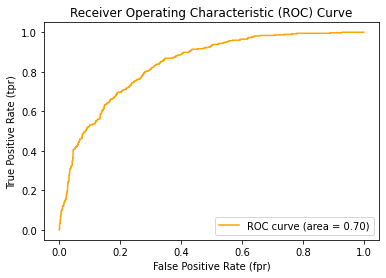

In [23]:
# Create a function for plotting ROC curves
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predicton) # area under the curve

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange",label="ROC curve (area = %0.2f)" % auc)
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)

<a id='section3.3'></a>

#### Classification Report

[Index](#section0)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



<a id='section4'></a>

### Performing SMOTE

[Index](#section0)

<p align="center">
    <img align="left"src="../images/1.png" alt="Drawing" width="350"/>
    <img src="../images/2.png" alt="Drawing" width="350"/>
</p>

<img src="../images/3.png" alt="Drawing" width="500"/>

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=2,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X_standardized, y)

In [26]:
# size of original data
X.shape, y.shape

((7043, 3), (7043,))

In [27]:
# size of undersampled data
X_res.shape, y_res.shape

((10348, 3), (10348,))

In [28]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    5174
 1    1869
 Name: Churn, dtype: int64,
 0    5174
 1    5174
 Name: Churn, dtype: int64)

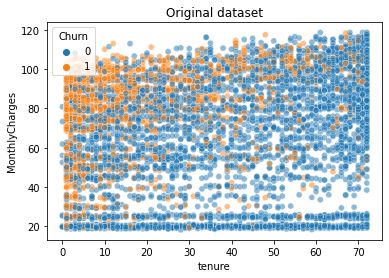

In [29]:
# plot of original data

sns.scatterplot(
    data=X, x="tenure", y="MonthlyCharges", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

In [30]:
X_res_plot =  pd.DataFrame(X_res, columns=["tenure", "SeniorCitizen", "MonthlyCharges"])
X_res_plot

,tenure,SeniorCitizen,MonthlyCharges
0,-1.277445,-0.439916,-1.160323
1,0.066327,-0.439916,-0.259629
2,-1.236724,-0.439916,-0.362660
3,0.514251,-0.439916,-0.746535
4,-1.236724,-0.439916,0.197365
...,...,...,...
10343,-0.680158,-0.439916,-0.501660
10344,-1.277445,-0.439916,0.539264
10345,0.421528,-0.439916,1.220932
10346,0.801558,-0.439916,1.340960


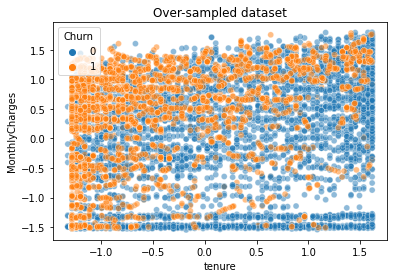

In [31]:
# plot of resample data

sns.scatterplot(
    data=X_res_plot, x="tenure", y="MonthlyCharges", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

<a id='section5'></a>

### Building the logistic regression model, with resampled target

[Index](#section0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,multi_class='ovr').fit(X_train, y_train)

In [34]:
y_preds = clf.predict(X_test)

<a id='section5.1'></a>

### Confusion Matrix

[Index](#section0)

In [35]:
cf_matrix = confusion_matrix(y_test,y_preds)
cf_matrix

array([[1167,  407],
       [ 400, 1131]])

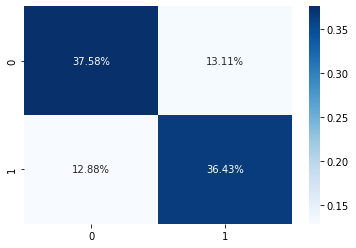

In [36]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

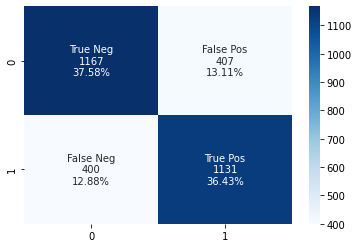

In [37]:
group_names = ["True Neg","False Pos",'False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='section5.2'></a>

### ROC curve and area under the curve

[Index](#section0)

In [38]:
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , ..., 0.99237611, 0.99364676,
       1.        ])

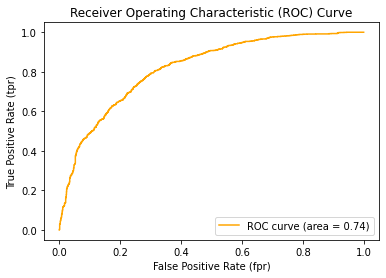

In [39]:
# Create a function for plotting ROC curves
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_preds) # area under the curve

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange",label="ROC curve (area = %0.2f)" % auc)
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)

In [40]:
auc

0.7400779900688607

<a id='section5.3'></a>

### Classification Report

[Index](#section0)

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1574
           1       0.74      0.74      0.74      1531

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



<a id='section6'></a>

## Undersample with Tomek Links
Well separated classes

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

[Index](#section0)

<div class="alert alert-warning">
  <strong>Tomek Links</strong>
    <p> If " Samples are nearest neighbours, and from a different class, they are Tomek Links.</p>
    <p> Removes the Tomek Link from the majority class</p>
        <p align="center">
            <li>Cleaning</li>
            <li>Final dataset shape varies</li>
            <li>Boundary is noise</li>
        </p>
</div>

In [42]:
# imbalanced target
round(df.Churn.value_counts()*100/ len(df),2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5634, 3), (1409, 3))

<p align="center">
    <img src="../images/4.png" alt="Drawing" width="350"/>
</p>

<p align="center">
    <img align="left"src="../images/5.png" alt="Drawing" width="375"/>
    <img align="right"src="../images/6.png" alt="Drawing" width="375"/>
</p>

In [45]:
from imblearn.under_sampling import TomekLinks
# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=8)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [46]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((5219, 3), (5219,))

In [47]:
# number of positive class in original dataset
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [48]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [49]:
X_train

array([[-0.46303731, -0.43991649,  0.00293498],
       [ 0.88073469, -0.43991649,  1.07811764],
       [-1.27744458, -0.43991649, -1.37303293],
       ...,
       [-0.82952058, -0.43991649, -1.44947559],
       [-0.82952058,  2.27315869,  1.15289851],
       [-0.25943549, -0.43991649, -1.49434411]])

## Plot data

Let's compare how the data looks before and after the undersampling.

In [50]:
X_train_plot =  pd.DataFrame(X_train, columns=["tenure", "SeniorCitizen", "MonthlyCharges"])
X_train_plot

,tenure,SeniorCitizen,MonthlyCharges
0,-0.463037,-0.439916,0.002935
1,0.880735,-0.439916,1.078118
2,-1.277445,-0.439916,-1.373033
3,-1.155283,-0.439916,0.180747
4,-1.318165,-0.439916,-0.095111
...,...,...,...
5629,-1.277445,-0.439916,1.004999
5630,-0.381597,-0.439916,0.875378
5631,-0.829521,-0.439916,-1.449476
5632,-0.829521,2.273159,1.152899


In [51]:
X_res_plot =  pd.DataFrame(X_resampled, columns=["tenure", "SeniorCitizen", "MonthlyCharges"])
X_res_plot

,tenure,SeniorCitizen,MonthlyCharges
0,-0.463037,-0.439916,0.002935
1,0.880735,-0.439916,1.078118
2,-1.277445,-0.439916,-1.373033
3,-1.155283,-0.439916,0.180747
4,-1.318165,-0.439916,-0.095111
...,...,...,...
5214,-1.277445,-0.439916,1.004999
5215,-0.381597,-0.439916,0.875378
5216,-0.829521,-0.439916,-1.449476
5217,-0.829521,2.273159,1.152899


Text(0.5, 1.0, 'Original data')

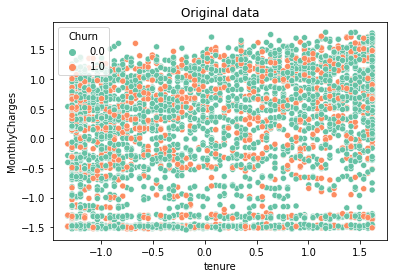

In [52]:
# original data

sns.scatterplot(data=X_train_plot,
                x="tenure",
                y="MonthlyCharges",
                hue=y_train,
                palette="Set2")

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

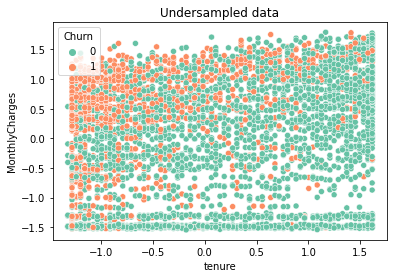

In [53]:
sns.scatterplot(data=X_res_plot,
                x="tenure",
                y="MonthlyCharges",
                hue=y_resampled,
                palette="Set2")

plt.title('Undersampled data')

In [54]:
# function to train random forests and evaluate the performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [55]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.8242075533143967
Test set
Random Forests roc-auc: 0.8442271263987082


In [56]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.8460374590096824
Test set
Random Forests roc-auc: 0.8455352614199799


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [58]:
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,multi_class='ovr').fit(X_train, y_train)

In [59]:
y_preds = clf.predict(X_test)

<a id='section6.1'></a>

### Confusion Matrix

[Index](#section0)

In [60]:
cf_matrix = confusion_matrix(y_test,y_preds)
cf_matrix

array([[976, 101],
       [247, 242]])

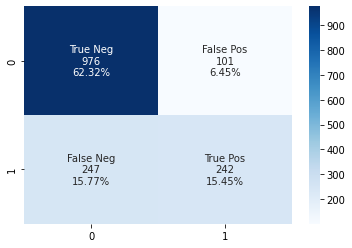

In [61]:
group_names = ["True Neg","False Pos",'False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

<a id='section6.2'></a>

### ROC curve and area under the curve

[Index](#section0)

In [62]:
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.28505107e-04,
       9.28505107e-04, 1.85701021e-03, 1.85701021e-03, 2.78551532e-03,
       2.78551532e-03, 3.71402043e-03, 3.71402043e-03, 4.64252553e-03,
       4.64252553e-03, 4.64252553e-03, 4.64252553e-03, 5.57103064e-03,
       5.57103064e-03, 6.49953575e-03, 6.49953575e-03, 8.35654596e-03,
       8.35654596e-03, 9.28505107e-03, 9.28505107e-03, 1.02135562e-02,
       1.02135562e-02, 1.11420613e-02, 1.11420613e-02, 1.20705664e-02,
       1.20705664e-02, 1.39275766e-02, 1.39275766e-02, 1.48560817e-02,
       1.48560817e-02, 1.57845868e-02, 1.57845868e-02, 1.67130919e-02,
       1.67130919e-02, 1.76415970e-02, 1.76415970e-02, 1.85701021e-02,
       1.85701021e-02, 1.94986072e-02, 1.94986072e-02, 1.94986072e-02,
       1.94986072e-02, 2.04271123e-02, 2.04271123e-02, 2.13556175e-02,
       2.13556175e-02, 2.22841226e-02, 2.22841226e-02, 2.22841226e-02,
       2.22841226e-02, 2.41411328e-02, 2.41411328e-02, 2.59981430e-02,
      

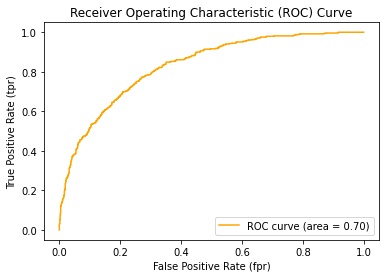

In [63]:
# Create a function for plotting ROC curves
auc = metrics.roc_auc_score(y_test, y_preds) # area under the curve

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange",label="ROC curve (area = %0.2f)" % auc)
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)

<a id='section6.3'></a>

### Classification Report

[Index](#section0)

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1077
           1       0.71      0.49      0.58       489

    accuracy                           0.78      1566
   macro avg       0.75      0.70      0.72      1566
weighted avg       0.77      0.78      0.77      1566

